In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [87]:
twitter_df = pd.read_csv("twitter_data/DKNG_tweets.csv")
stock_df = pd.read_csv("stock_data/DKNG.csv")

In [88]:
stock_df['% change tomorrow'] = -stock_df[['Close']].pct_change(periods=-1)
stock_df = stock_df.dropna()
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df.head()

,Date,Open,High,Low,Close,Volume,% change tomorrow
0,2020-10-07,52.860001,54.880001,52.200001,53.330002,65474600,-0.043028
1,2020-10-08,54.158001,54.779999,50.610001,51.130001,37242500,-0.047317
2,2020-10-09,50.750000,51.700001,48.259998,48.820000,29572800,0.035178
3,2020-10-12,51.009998,52.520000,50.330002,50.599998,31713500,0.011333
4,2020-10-13,50.849998,51.400002,49.525002,51.180000,19134200,-0.076114


In [89]:
# getting the dates in order
twitter_df["datetime"] = twitter_df[['timestamp']].apply(datetime.fromtimestamp,axis=1)
twitter_df['date'] = twitter_df['datetime'].dt.date

In [90]:
#adding sentiment in
analyzer = SentimentIntensityAnalyzer()
twitter_df["sentiment_scores"] = twitter_df[['text']].apply(analyzer.polarity_scores,axis=1)
twitter_df["sentiment"] = twitter_df[['text']].apply(lambda x: analyzer.polarity_scores(x)['compound'],axis=1)

In [91]:
twitter_df.tail()

,name,timestamp,likes,isretweet,isreply,text,retweets,replies,datetime,date,sentiment_scores,sentiment
2473,mattkalish,1506724551,6,False,False,🤦‍♂️ https://t.co/CKl8eqkgtl,0,0,2017-09-29 17:35:51,2017-09-29,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2474,mattkalish,1506718952,0,True,False,RT @DF_Advantage: It's almost time #DraftKings...,1,0,2017-09-29 16:02:32,2017-09-29,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2475,mattkalish,1506709165,6,False,False,More winners of the #DraftKingsPizzaChallenge ...,1,2,2017-09-29 13:19:25,2017-09-29,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.7569
2476,mattkalish,1506701462,4,False,False,More winners of the #DraftKingsPizzaChallenge!...,0,3,2017-09-29 11:11:02,2017-09-29,"{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...",0.5697
2477,mattkalish,1506695306,3,False,False,First batch of new #DraftKingsPizzaChallenge w...,1,7,2017-09-29 09:28:26,2017-09-29,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.7339


# Simple analysis

In [134]:
#this might not be too telling since there has been a lot of spam posts of late 
#(maybe filter to get rid of posts that seem like spam)
filtered_df = twitter_df[(twitter_df['retweets'] > 10) & (twitter_df['likes'] > 10)]
means = filtered_df[["likes", "retweets", "replies", "sentiment", "date"]].groupby(['date']).mean()
means = means.dropna()

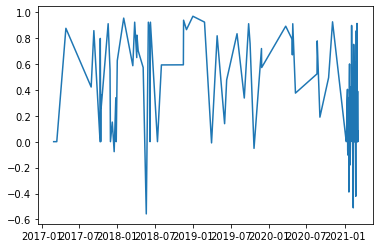

In [135]:
plt.plot(means['sentiment'])

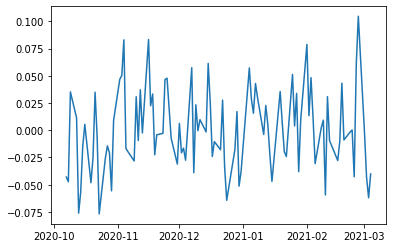

In [136]:
#filtered_for_recent = stock_df[stock_df.Date >= np.datetime64(datetime(2020, 10, 8).date())]
plt.plot(stock_df.set_index('Date')["% change tomorrow"])

In [137]:
merged = pd.merge(stock_df.set_index('Date'), means, left_index=True, right_index=True)

In [138]:
merged

,Open,High,Low,Close,Volume,% change tomorrow,likes,retweets,replies,sentiment
2020-10-16,45.500000,46.529999,43.500000,44.340000,39295700,0.005384,149.000000,13.000000,65.000000,0.493900
2020-11-04,39.430000,40.790001,38.330002,39.459999,28877500,0.082965,181.000000,24.000000,28.000000,0.924500
2021-01-13,53.509998,55.230000,52.619999,54.630001,11517600,0.005280,204.000000,151.500000,122.500000,0.319850
2021-01-15,54.509998,55.029999,51.700001,53.700001,10013600,-0.046988,150.500000,19.500000,6.500000,0.403700
2021-01-20,53.924999,54.099998,52.070000,53.180000,11507500,0.007095,247.666667,33.000000,14.333333,0.000000
2021-01-21,53.580002,54.445000,52.660000,53.560001,8633700,-0.019608,158.500000,17.000000,11.000000,0.339700
2021-01-22,52.889999,53.560001,51.750000,52.529999,9262400,-0.024176,125.000000,13.000000,7.000000,-0.388500
2021-01-25,52.959999,53.639999,49.680000,51.290001,13377600,0.051239,161.500000,30.500000,4.000000,0.599400
2021-01-26,53.680000,56.520000,52.849998,54.060001,24225800,0.003870,75.000000,25.500000,3.500000,0.325850
2021-01-27,53.630001,56.689999,52.090000,54.270000,19397200,0.033826,699.714286,77.571429,6.714286,0.221757


In [139]:
stock_df

,Date,Open,High,Low,Close,Volume,% change tomorrow
0,2020-10-07,52.860001,54.880001,52.200001,53.330002,65474600,-0.043028
1,2020-10-08,54.158001,54.779999,50.610001,51.130001,37242500,-0.047317
2,2020-10-09,50.750000,51.700001,48.259998,48.820000,29572800,0.035178
3,2020-10-12,51.009998,52.520000,50.330002,50.599998,31713500,0.011333
4,2020-10-13,50.849998,51.400002,49.525002,51.180000,19134200,-0.076114
...,...,...,...,...,...,...,...
97,2021-02-26,60.000000,62.669998,58.270000,61.529999,25952800,0.104628
98,2021-03-01,63.480000,68.900002,63.250000,68.720001,35787200,-0.002041
99,2021-03-02,68.010002,70.379997,66.889999,68.580002,21930700,-0.043042
100,2021-03-03,71.830002,72.160004,64.890999,65.750000,26283800,-0.062026


In [140]:
merged['sentiment'].corr(merged['% change tomorrow'])

0.46236919595935194

In [142]:
len(merged['sentiment'])

30

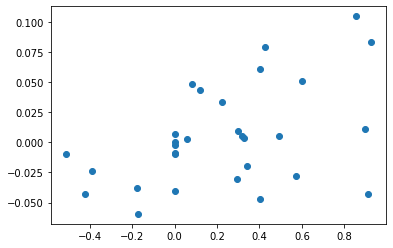

In [143]:
plt.scatter(merged['sentiment'], merged['% change tomorrow'])

# :) Somewhat interesting results after filtering out spam